## 01 회귀 소개

In [1]:
# 회귀(Regression)은 현대 통계학을 떠받치고 있는 주요 기둥 중 하나이다.
# 회귀 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계 기법이다.
# 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다.

# Y= W1*X1+W2*X2+W3*X3... 이라는 선형 회귀식을 예로 들어 X는 독립변수 W는 독립변수의 값에 영향을 미치는 회귀 계수이다.
# 머신러닝 회귀 예측의 핵심은 최적의 회귀 계수를 찾아내는 것이다.
# 회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있다.

# 지도학습은 두 가지 유형으로 나뉘는데, 분류와 회귀이다.
# 분류는 예측 값이 카테고리와 같은 이산형 클래스 값, 회귀는 연속형 숫자 값이다.

# 여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용된다.
# 선형 회귀는 실제 값과 예측 값의 차이(오류의 제곱 값)을 최소화 하는 직선형 회귀선을 최적화 하는 방식이다.
# 규제(Regulation) 방법에 따라 별도의 유형으로 나뉠 수 있다.
# 규제는 일반적인 선형 회귀의 과적합 문제를 해결 하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말한다.

# 대표적인 선형 회귀 모델
# - 일반 선형 회귀: 예측값과 시제 값의 RSS(Residual Sum of Squares)를 최소화 할 수 있도록 회귀 계수를 최적화 함.
# - 릿지(Ridge): 선형 회귀에 L2 규제를 추가한 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소 시키기 위해서
#               회귀 계수값(W)을 더 작게 만드는 규제 모델이다.
# - 라쏘(Lasso): 선형 회귀에 L1 규제를 추가한 모델. L1는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측시
#               피처(X)가 선택되지 않게 하는 것이다.
# - 엘라스틱넷(ElasticNet): L2, L1 규제를 함께 결합한 모델. L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.
# - 로지스틱 회귀(Logistic Regression): 분류에 사용되는 선형 모델. 이진 분류 뿐만 아니라 희소 영역(텍스트)의 분류에서도 뛰어난 예측 성능을 보인다.

## 02 단순 선형 회귀를 통한 회귀 이해

In [2]:
# 단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀 이다.
# 특정 기울이과 절편을 가진 1차 함수식으로 모델링 할 수 있다.
# 독립변수가 1개인 단순 선형 회귀에서는 이 기울기 W1과 절편 W0을 회귀 계수로 지칭한다.
# 실제 값은 1차 함수 값에서 실제 값만큼의 오류 값을 빼거나 더한 값이 된다.(W0+W1*X+오류값).
# 실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류(잔차:residual)라고 한다.
# 최적의 회귀 모델을 만든다는 것은 전체 데이터의 잔차 합이 최소가 되는 모델을 만든다는 의미이다.

# 오류 값은 +나 -가 될 수 있다. 그래서 전체 데이터의 오류 합을 구하기 위해 단순히 더했다가 뜻하지 않게 오류 합이 줄어들 수 있다.
# 따라서 보통 오류 합을 계산할 때는 절대값을 취해서 더하거나(MAE:Mean Absolute Error),
# 오류 값의 제곱을 구해서 더하는 방식(RSS: Residual Sum of Square)를 취한다.
# 일반적으로 미분 등의 계산을 편리하기 위해서 RSS 방식으로 오류 합을 구한다.

# RSS는 변수가 W0, W1인 식으로 표현할 수 있으며, RSS를 최소로 하는 W0, W1(회귀계수)를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다.
# RSS는 W변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요하다.

# 회귀에서 RSS는 비용(Cost)이며 W 변수로 구성되는 RSS를 비용 함수 라고 한다. (손실함수: loss function 라고도 함)
# 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용함수가 반환하는 값(오류 값)을 지속해서 감소 시키고
# 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다.

## 03 비용 최소화 하기 - 경사 하강법(Gradient Descent) 소개 

In [3]:
# 경사 하강법은 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화 하는 방법을 제공하는 뛰어난 방식이다.
# 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이터 하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식이다.
# 고차원 방정식을 푸는 것보다 훨씬 더 직관적이고 빠르게 비용 함수가 최소가 되는 W 파라미터 값을 구할 수 있다.
# 경사 하강법은 반복적으로 비용 함수의 반환 값(예측 값과 실제 값의 차이)이 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나간다.
# W 값을 계속 업데이터 해 나가면서, 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고
# 그 때의 W 값을 최적 파라미터로 반환한다.

# 비용함수가 포물선 형태의 2차 함수라면 경사 하강법은 최초 W에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로
# 순차적으로 W를 업데이트 한다. 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고
# 그 때의 W를 반환한다.
# 비용 함수 RSS(W0, W1) = R(W)
# R(W)는 변수가 W 파라미터로 이루어진 함수. 
# R(W)를 미분해서 미분 함수의 최솟값을 구해야 하는데, R(W)는 두 개의 W 파라미터인 W0와 W1을 각각 가지고 있기 때문에
# 일반적인 미분을 적용할 수 없고, W0, W1 각 변수에 편미분을 적용해야한다.

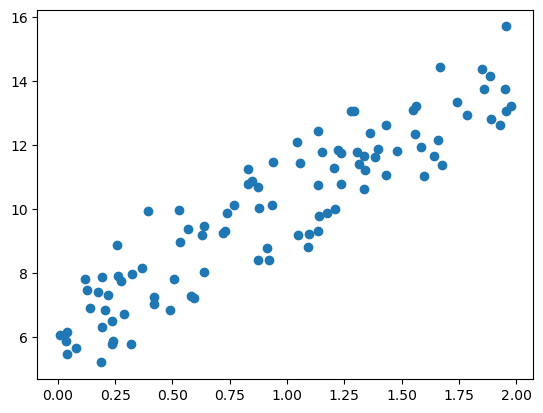

In [9]:
# 경사 하강법을 구현해보기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [7]:
X.shape, y.shape

((100, 1), (100, 1))

In [11]:
# ** w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성.**

# 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임
# 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.

# 새로운 w1과 w0를 update함

In [13]:
# 비용 함수 정의 하기
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [14]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 형렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [15]:
# 반복적인 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [16]:
# 예측 오차 비용을 계산 하는 함수 생성 및 경사 하강법
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{0:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:4.022
Gradient Descent Total Cost:0.9935


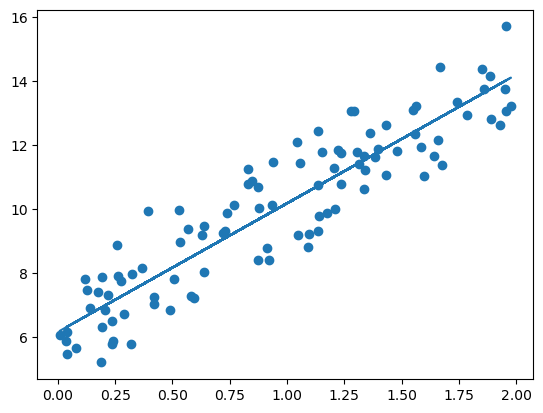

In [17]:
# 회귀선 그려보기

plt.scatter(X, y)
plt.plot(X, y_pred)

In [18]:
# 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 하므로 수행 시간이 매우 오래걸린다는 단점이 있다.
# 실전에서는 확률적 경사 하강법(Stochastic Gradient Descent)를 이용한다.
# 확률적 경사 하강법은 일부 데이터만 이용해 w가 업데이트 되는 값을 계산하므로 빠른 속도를 보장한다.
# 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다.

##### 미니배치 확률적 경사 하강법을 이용한 최적 비용 함수 도출

In [19]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체, X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [22]:
# w1, w0 및 예측 오류 비용 계산 해보자.
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


In [23]:
# 피처가 여러 개인 경우도 확장해 유사하게 도출 할 수 있다.
# y(hat) = w0 + w1*X1 + w2*X2 + ... + w100*X100
# 회귀 계수가 많아지더라도 선형대수를 이용해 간단하게 예측값을 도출 할 수 있다.
# 데이터의 개수가 N이고 피처가 M개의 입력 행렬을 Xmat, 회귀 계수 w1, w1, ..., w100을 W 배열로 표기하면
# y(hat) = np.dot(Xmat, Wt) + w0로 구할 수 있다.

# w0를 Weight의 배열인 W 안에 포함시키기 위해서 Xmat의 맨 처음 열에 모든 데이터의 값이 1인 피처 Feat0을 추가한다.
# 이제 회귀 예측값은 y(hat)= Xmat * Wt와 같이 도출할 수 있다.